# Cleaning the Dataset 🧼🧽🚿

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from src.clean import numeric

In [3]:
trainDiam = pd.read_csv('./input/train.csv', index_col=0)
trainDiam.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


In [5]:
trainDiam.shape

(40455, 10)

In [20]:
testDiam = pd.read_csv('./input/predict.csv', index_col=0)
testDiam.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,2.36,Ideal,I,SI2,60.8,54.0,8.68,8.57,5.24
1,2.04,Ideal,H,SI2,62.0,56.0,8.18,8.23,5.09
2,0.51,Ideal,I,SI1,61.7,54.0,5.18,5.19,3.20
3,0.30,Ideal,I,SI1,61.3,56.0,4.32,4.33,2.65
4,0.96,Fair,H,VS2,68.8,56.0,6.11,5.98,4.16


In [21]:
testDiam.shape

(13485, 9)

----------

## Step 1: Any missing data to remove?


In [6]:
trainDiam.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

<h3><center> There is no missing data to be removed <h3><center>

---------

## Step 2: Any categorical data to convert?

In [7]:
trainDiam.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

<h3><center> The cut, color and clarity columns need to be converted into numeric data </center></h3>

In [8]:
print(trainDiam["cut"].unique())
print(trainDiam["color"].unique())
print(trainDiam["clarity"].unique())

['Very Good' 'Ideal' 'Premium' 'Good' 'Fair']
['F' 'E' 'D' 'H' 'G' 'J' 'I']
['VS2' 'SI1' 'VS1' 'SI2' 'VVS2' 'VVS1' 'IF' 'I1']


<h3><center> We use the 'numeric' function to turn them into numeric data </center></h3>

In [9]:
numeric(trainDiam)

In [10]:
trainDiam.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,3,1,1,62.8,56.0,4.29,4.31,2.70,605
1,0.34,4,2,2,62.6,55.0,4.46,4.49,2.80,565
2,0.40,3,3,2,60.3,62.0,4.70,4.75,2.85,720
3,0.40,5,4,3,61.8,59.2,4.72,4.74,2.92,793
4,0.90,3,3,2,61.0,63.0,6.10,6.13,3.73,4381


------------

## Step 3: Column collinearity - any high correlations?

In [11]:
corr = trainDiam.corr()
corr

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.019932,0.225164,-0.069781,0.032379,0.181791,0.974898,0.944513,0.947538,0.922567
cut,-0.019932,1.000000,0.012918,-0.019330,-0.306553,-0.064546,-0.005865,-0.013612,-0.049058,0.026724
color,0.225164,0.012918,1.000000,0.014107,0.041625,0.010376,0.205261,0.198343,0.202775,0.135179
clarity,-0.069781,-0.019330,0.014107,1.000000,-0.011399,-0.057519,-0.092540,-0.088115,-0.090360,-0.057443
depth,0.032379,-0.306553,0.041625,-0.011399,1.000000,-0.297164,-0.020876,-0.025105,0.099375,-0.005105
table,0.181791,-0.064546,0.010376,-0.057519,-0.297164,1.000000,0.194763,0.181585,0.149242,0.129777
x,0.974898,-0.005865,0.205261,-0.092540,-0.020876,0.194763,1.000000,0.967114,0.965114,0.884089
y,0.944513,-0.013612,0.198343,-0.088115,-0.025105,0.181585,0.967114,1.000000,0.940678,0.858536
z,0.947538,-0.049058,0.202775,-0.090360,0.099375,0.149242,0.965114,0.940678,1.000000,0.855923
price,0.922567,0.026724,0.135179,-0.057443,-0.005105,0.129777,0.884089,0.858536,0.855923,1.000000


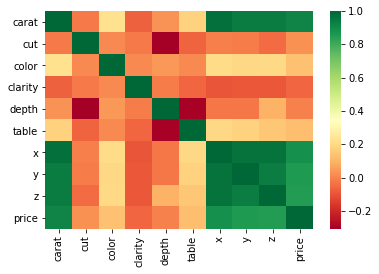

In [12]:
heat = sns.heatmap(corr, cmap="RdYlGn")

<h3><center> In order to see the heatmap in a more instinctive fashion: <h3><center>

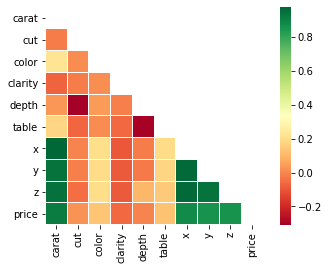

In [13]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
heat_clean = sns.heatmap(corr, mask=mask, square=True, linewidths=.05, cmap="RdYlGn")

<h3><center> There seems to be a very high correlation between price and carat <br /> and also between x, y, z and price/carat <h3><center> <br />

---------

## Step 4: Descriptive statistics - any outliers to remove?

#### The 'price' column is not included as its values disrupt the overall picture of the boxplots

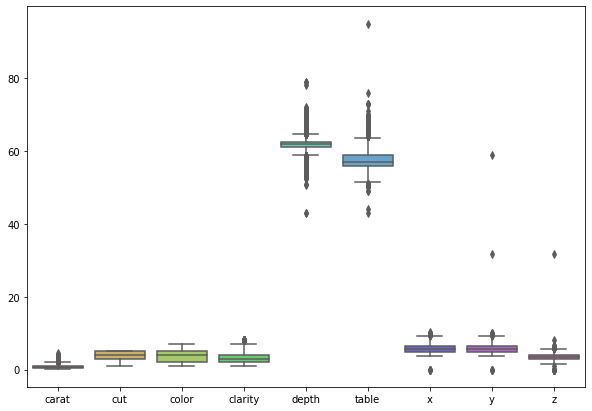

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(data=trainDiam.drop(columns=('price')), orient="v", palette="hls");

<h3><center> The depth and table columns should both have their outliers removed<h3><center>

#### I would remove them this way if Kaggle accepted less rows in the final csv...

In [15]:
# z_scores = stats.zscore(trainDiam)       calculate z-scores of df

# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# new_df = df[filtered_entries]

----------

## Step 5: Column-wise data distribution - is the distribution skewed?

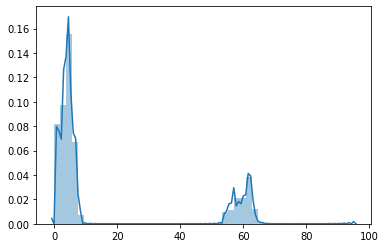

In [16]:
hist = sns.distplot(trainDiam.drop(columns=('price')))

# y = trainDiam.drop(columns=('price'))
# ax = sns.distplot(y)

---------

---------

### Exporting df to csv file

In [18]:
# trainDiam.to_csv('./output/diamond_train_numeric.csv')

In [22]:
numeric(testDiam)

In [24]:
# testDiam.to_csv('./output/diamond_test_numeric.csv')

-------

---------

## With getdummies